# Machine learning models to predict loan approvals

## Data Import

In [74]:
# Loading data
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

df = pd.read_csv('dataset.csv', sep=",", index_col=0)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [76]:
print(df.shape)
# We notice that the total count of LoanAmount and Credit_History is lesser than the total number of elements

(614, 12)


In [77]:
df.Loan_Status.value_counts()  #control over target variable

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [78]:
# Check ID code duplicates
print(df[df.index.duplicated()])
print(df.duplicated().sum())

Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
0


In [79]:
# check for missing data
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [80]:
# Other methods for handling NaN values could be considered, but given the importance of the missing values (Loan Amount and Credit History), 
# we have decided to remove the affected rows
df_dropped = df.dropna()
print(df_dropped.shape)

(480, 12)


In [81]:
# Check if removing rows significally altered the data
df_dropped.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [82]:
df_dropped.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [83]:
df_dropped.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Categorical Analysis

In [84]:
df_categorical = df_dropped.select_dtypes(include=['object'])
print(df_categorical.shape)
df_categorical.head()

(480, 7)


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
Loan_ID,,,,,,,
LP001003,Male,Yes,1,Graduate,No,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
LP001008,Male,No,0,Graduate,No,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,Urban,Y


In [85]:
# Creates two subsets where the observations are divided according to the target
df_Y_cat = df_categorical[df_dropped['Loan_Status']=='Y'] # records with approval(original Y)
df_N_cat = df_categorical[df_dropped['Loan_Status']=='N'] # records without approval(original N)

The following chart provides an overview of how various categorical variables are associated with loan approval (blue) and rejection (orange).

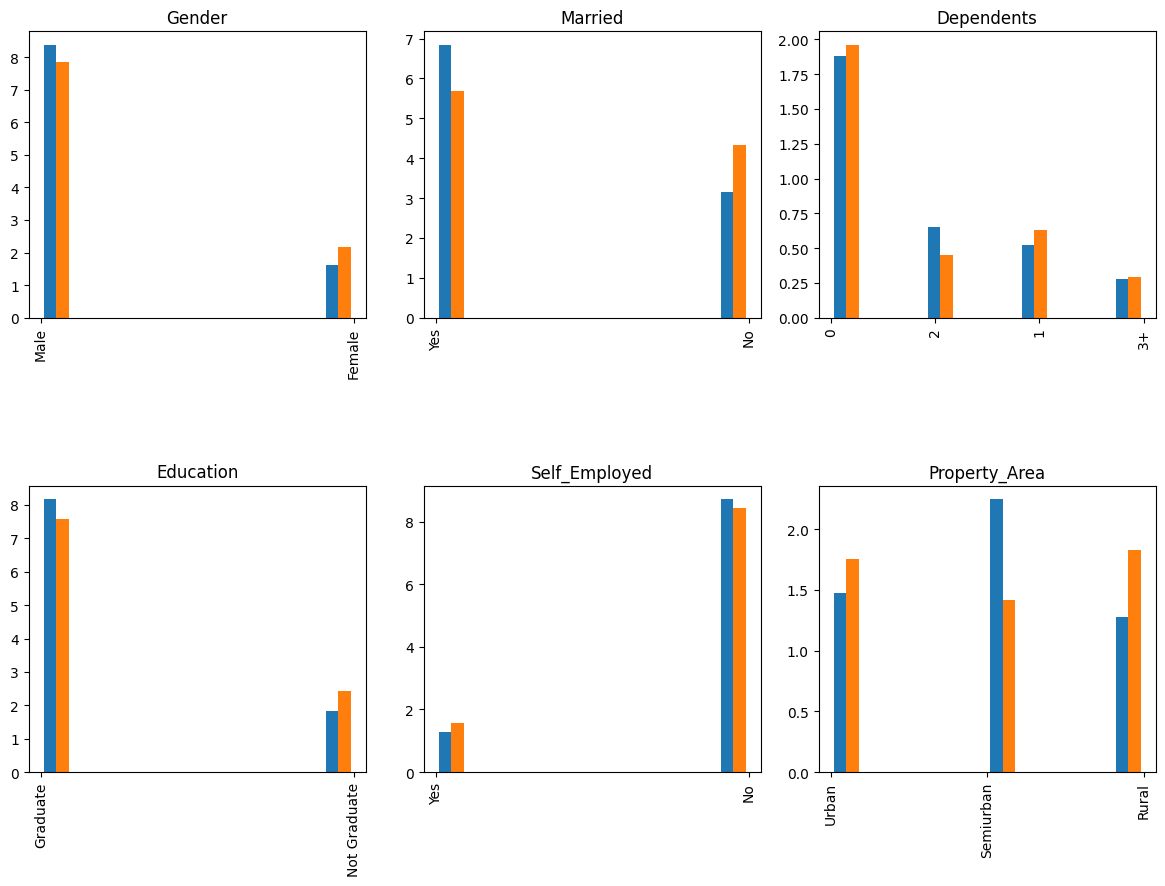

In [86]:
df_histogram= df_categorical.drop("Loan_Status", axis=1)

fig, axes = plt.subplots(2, 3, figsize=[12,8])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in df_histogram.columns:
    plt.sca(axes[i]) 
    plt.hist([df_Y_cat[x], df_N_cat[x]], density = True)
    plt.xticks(rotation = 90) 
    plt.title(x)
    i+=1
plt.show()

Female, unmarried, not graduate and/or self-employes people appear to have fewer loans approved overall.
The semiurban area shows the highest number of loan approvals, while urban and rural areas appear to have a greater number of rejections.

This set of histograms displays the distributions of five categorical variables within the dataset. 

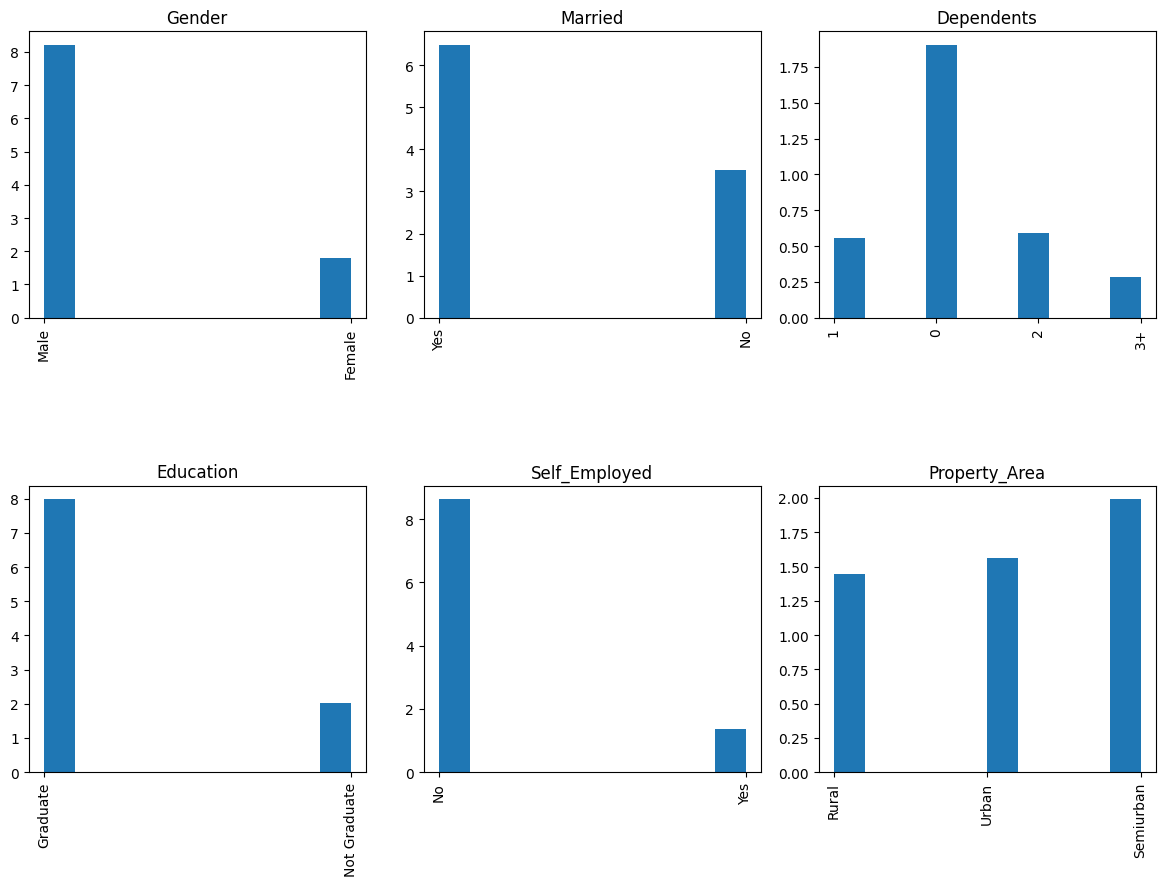

In [87]:
fig, axes = plt.subplots(2, 3,figsize=[12,8])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in df_histogram.columns:
    plt.sca(axes[i])
    plt.hist(df_histogram[x],density=True)
    plt.xticks(rotation = 90) 
    plt.title(x)
    i+=1
plt.show()

The dataset is  skewed towards males, married, graduate and/or not self-employed people.
Semiurban areas have a slightly bigger representation.

The categories that receive fewer loans are also underrepresented in the dataset, so it might be difficult to draw reliable conclusions. 
This could reflect reality, but it might also indicate a bias in the data collection process.

## Numerical Analysis

In [88]:
df_numerical = df_dropped.select_dtypes(include=[np.number])
print(df_numerical.shape)
df_numerical.head() 

(480, 5)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_ID,,,,,
LP001003,4583,1508.0,128.0,360.0,1.0
LP001005,3000,0.0,66.0,360.0,1.0
LP001006,2583,2358.0,120.0,360.0,1.0
LP001008,6000,0.0,141.0,360.0,1.0
LP001011,5417,4196.0,267.0,360.0,1.0


The following series of histograms provides insights into the distributions of the numerical variables in the dataset.

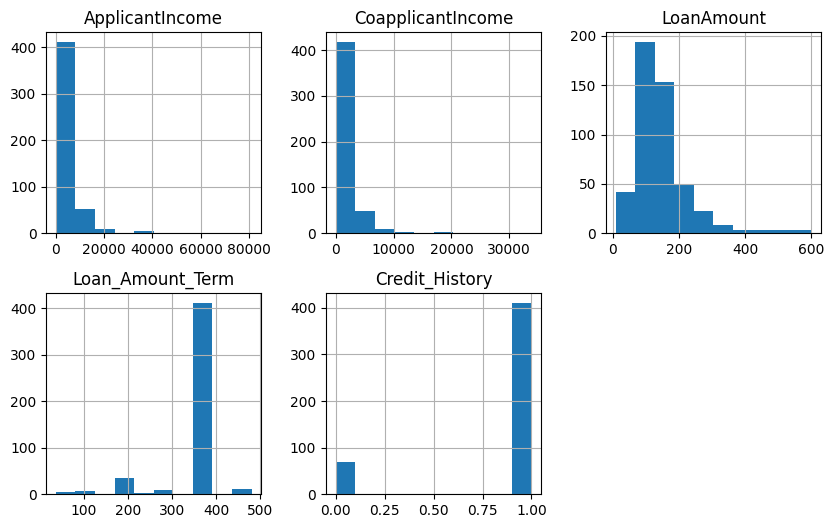

In [89]:
df_hist_num=df_numerical.hist(layout=(2,3), figsize=(10,6))

The majority of applicants and coapplicants have relatively low income levels. 
Most loan amounts are concentrated in the lower range, with the frequency sharply decreasing as the loan amount increases. 

The term for loans shows a strong peak around 360, which likely represents a common loan duration (e.g., 30 years). 
A large majority of the applicants have a credit history value of 1, indicating that they likely have a positive credit history. 


Transforming variables into a logarithmic scale is useful when the data is heavily right-skewed, as it can help stabilize variance, reduce the impact of outliers, and make patterns more interpretable. 

In [90]:
import math
pd.options.mode.chained_assignment = None 

df_numerical['logApplicantIncome']=df_numerical['ApplicantIncome'].apply(lambda x: math.log(x+1))
df_numerical['logCoapplicantIncome']=df_numerical['CoapplicantIncome'].apply(lambda x: math.log(x+1))
df_numerical['logLoanAmount']=df_numerical['LoanAmount'].apply(lambda x: math.log(x+1))


df_numerical.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,logApplicantIncome,logCoapplicantIncome,logLoanAmount
Loan_ID,,,,,,,,
LP001003,4583,1508.0,128.0,360.0,1.0,8.430327,7.319202,4.859812
LP001005,3000,0.0,66.0,360.0,1.0,8.006701,0.000000,4.204693
LP001006,2583,2358.0,120.0,360.0,1.0,7.857094,7.765993,4.795791


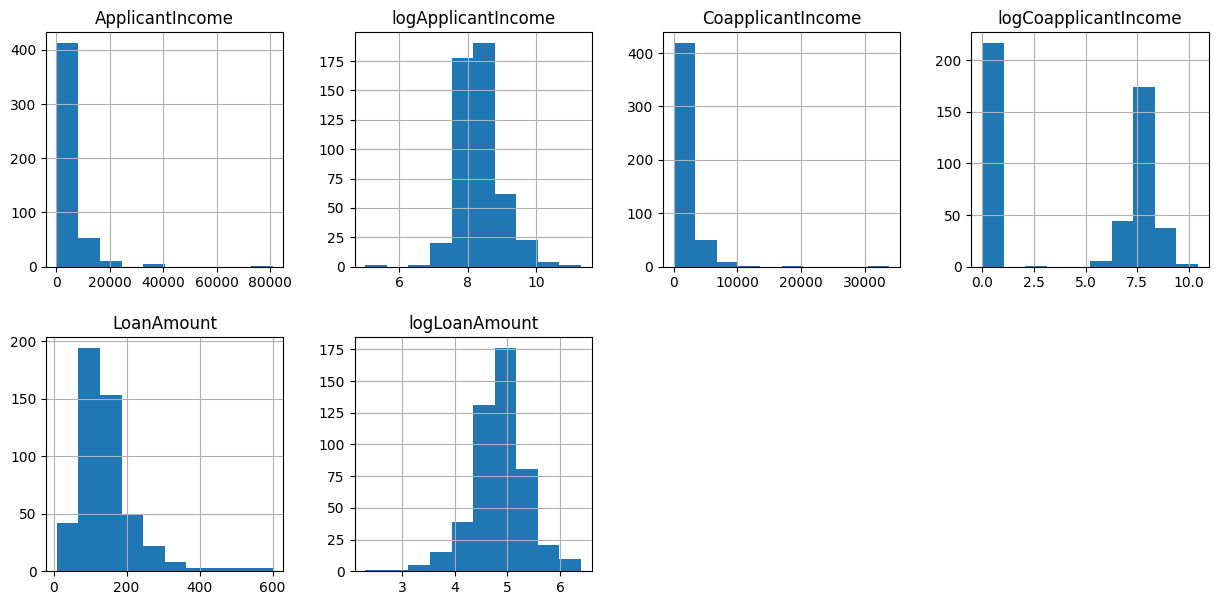

In [91]:
df_hist=df_numerical[['ApplicantIncome','logApplicantIncome', 'CoapplicantIncome','logCoapplicantIncome', 'LoanAmount','logLoanAmount']].hist(layout=(2,4), figsize=(15,7))

In [92]:
selection_numerical=['logApplicantIncome', 'logCoapplicantIncome', 'logLoanAmount', 'Loan_Amount_Term', 'Credit_History']
df_selection_numerical=df_numerical[selection_numerical]

In [93]:
# Creates two subsets where the observations are divided according to the target
df_Y_num=df_selection_numerical[df_dropped['Loan_Status']=='Y'] # records with approval(original Y)
df_N_num=df_selection_numerical[df_dropped['Loan_Status']=='N'] # records without approval(original N)

The following chart is used to visualize the distribution of numerical variables, separated by whether the loan was approved or rejected. 

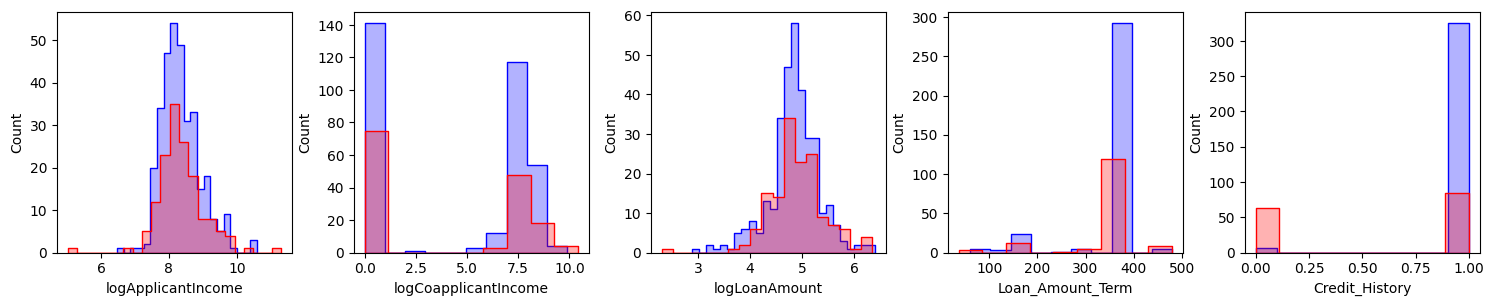

In [94]:
%matplotlib inline
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(15, 3))
fig.tight_layout() 

for i, ax in zip(range(df_numerical.columns.size), axes.flat):
    sns.histplot(df_Y_num.iloc[:, i], color="blue", element="step", ax=ax, alpha=0.3)
    sns.histplot(df_N_num.iloc[:, i], color="red", element="step", ax=ax, alpha=0.3)

plt.show()


Most people with a Credit History = 0 recieve a rejection.  
Rejection is also more prominent in case of an extremely high loan amount. 

In [95]:
df_selection_numerical = pd.concat([df_selection_numerical, df_dropped["Loan_Status"]], axis = 1)

print(df_selection_numerical.shape)
df_selection_numerical.head()

(480, 6)


,logApplicantIncome,logCoapplicantIncome,logLoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Loan_ID,,,,,,
LP001003,8.430327,7.319202,4.859812,360.0,1.0,N
LP001005,8.006701,0.000000,4.204693,360.0,1.0,Y
LP001006,7.857094,7.765993,4.795791,360.0,1.0,Y
LP001008,8.699681,0.000000,4.955827,360.0,1.0,Y
LP001011,8.597482,8.342125,5.590987,360.0,1.0,Y


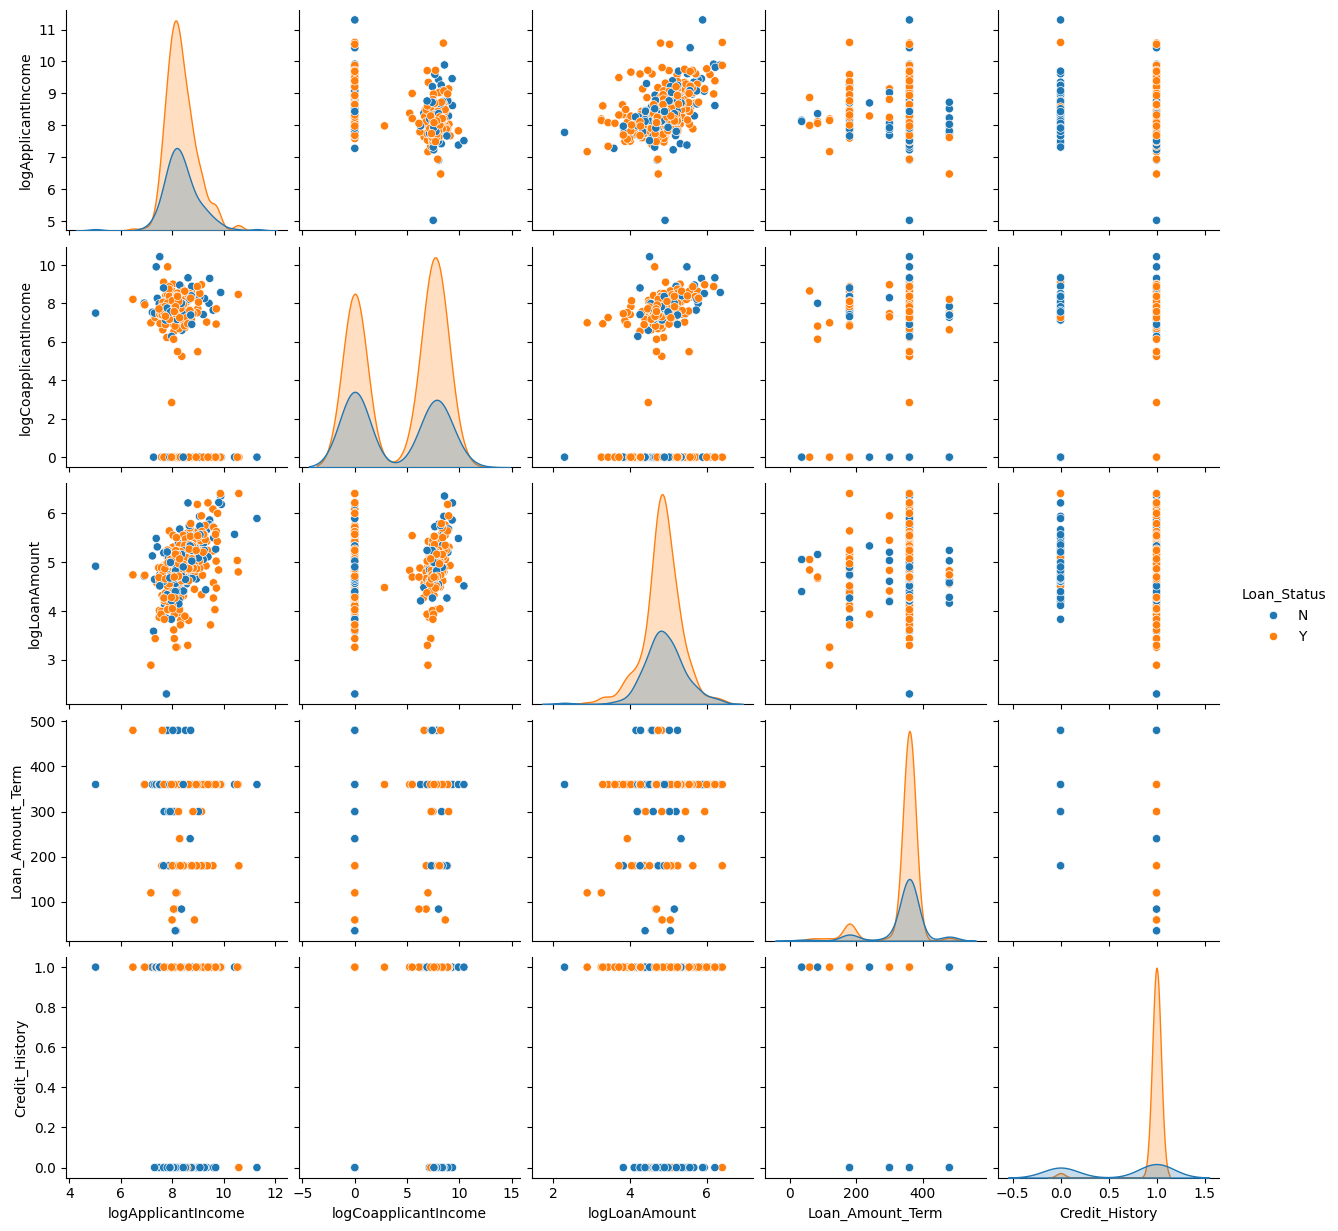

In [96]:
sns.pairplot(df_selection_numerical, hue='Loan_Status')

On the diagonal of the pairplot, I observe the distribution of each individual variable with respect to the target.  
In the off-diagonal cells, pairs of the variables under consideration, also in relation to the target.

## Data Encoding and Scaling

In [97]:
from sklearn.preprocessing import MinMaxScaler

independent_variables = df_selection_numerical.iloc[:,:-1] #no target

scaler =  MinMaxScaler().fit(independent_variables) # No target
df_scaled = pd.DataFrame(scaler.transform(independent_variables))
df_scaled.columns = independent_variables.columns

df_scaled.tail()


,logApplicantIncome,logCoapplicantIncome,logLoanAmount,Loan_Amount_Term,Credit_History
475,0.470256,0.000000,0.481952,0.729730,1.0
476,0.525569,0.000000,0.344478,0.324324,1.0
477,0.633101,0.525901,0.789732,0.729730,1.0
478,0.623159,0.000000,0.716272,0.729730,1.0
479,0.543052,0.000000,0.633606,0.729730,0.0


In [98]:
# Save the scaler
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

<Axes: >

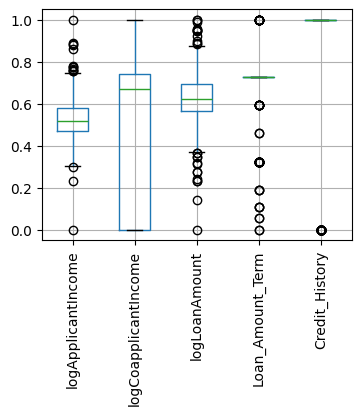

In [99]:
plt.figure(figsize=(4, 3))
df_scaled.boxplot(rot=90)

Mapping of categorical variables using dummies.

In [100]:
selection_categorical=['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']

dummies = pd.get_dummies(df_categorical[selection_categorical]) 

dummies.tail()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,
LP002978,True,False,True,False,True,False,False,False,True,False,True,False,True,False,False
LP002979,False,True,False,True,False,False,False,True,True,False,True,False,True,False,False
LP002983,False,True,False,True,False,True,False,False,True,False,True,False,False,False,True
LP002984,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True
LP002990,True,False,True,False,True,False,False,False,True,False,False,True,False,True,False


In [101]:
df_map_tot = df_scaled

print(dummies.shape)
print(df_map_tot.shape)

(480, 15)
(480, 5)


In [102]:
dummies = dummies.reset_index(drop=True)
df_map_tot = df_map_tot.reset_index(drop=True)
X=pd.concat([dummies,df_map_tot], axis = 1)

X.tail()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,logApplicantIncome,logCoapplicantIncome,logLoanAmount,Loan_Amount_Term,Credit_History
475,True,False,True,False,True,False,False,False,True,False,True,False,True,False,False,0.470256,0.000000,0.481952,0.729730,1.0
476,False,True,False,True,False,False,False,True,True,False,True,False,True,False,False,0.525569,0.000000,0.344478,0.324324,1.0
477,False,True,False,True,False,True,False,False,True,False,True,False,False,False,True,0.633101,0.525901,0.789732,0.729730,1.0
478,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,0.623159,0.000000,0.716272,0.729730,1.0
479,True,False,True,False,True,False,False,False,True,False,False,True,False,True,False,0.543052,0.000000,0.633606,0.729730,0.0


## Data Splitting


In [110]:
from sklearn.model_selection import train_test_split # Separate Train/Test sets
y= df_dropped['Loan_Status'].replace({'Y': 1, 'N': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, stratify=y, random_state= 321)
print(X_train.shape, X_test.shape)
print(X_train.shape[0] + X_test.shape[0]) # Coincides with original number of observations

(336, 20) (144, 20)
480


C:\Users\sanna\AppData\Local\Temp\ipykernel_23996\2615909239.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y= df_dropped['Loan_Status'].replace({'Y': 1, 'N': 0})


## Model Training

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [112]:
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    #print(confusion_matrix(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues");
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))
    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) ))
    ps=precision_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    acs=accuracy_score(y_test, y_pred)
    rs=recall_score(y_test, y_pred)
    return(ps,f1,acs,rs)
    

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    #y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)
    fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    return (fpr, tpr,auc)

### K-Nearest Neighbors

f1_train: 0.831182 using {'n_neighbors': np.int64(10)}
f1         train 0.835   test 0.814
precision  train 0.746   test 0.744


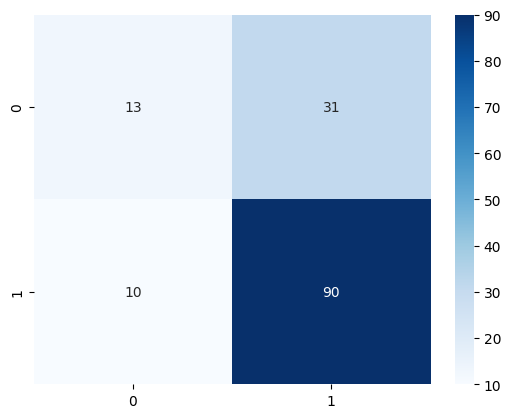

In [116]:
classifier = KNeighborsClassifier()    
parameters = {'n_neighbors':np.arange(1, 50)}  # Excluding those where almost all observations are classified the same, as an overfitting issue can be assumed
ps,f1,acs,rs=hyperp_search(classifier,parameters)
ps1=ps
f11=f1
acs1=acs
rs1=rs
# the result would remain the same even using values higher than the maximum

AUC: 0.72


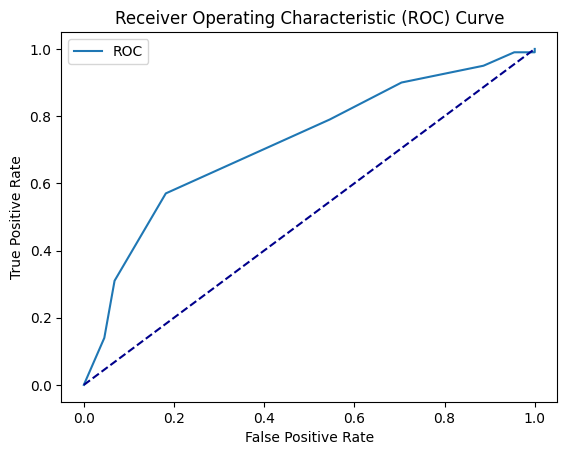

In [117]:
model_knn = KNeighborsClassifier(n_neighbors=10)
fpr1,tpr1,auc=roc(model_knn,X_train,y_train,X_test,y_test)
auc1=auc

The scatter matrix reveals that while most positive cases are correctly classified as positives, most negative cases are also incorrectly classified as positives. This suggests that the model is biased towards predicting the positive class.

### Decision Tree

f1_train: 0.825717 using {'criterion': 'gini', 'max_depth': np.int64(5), 'min_samples_leaf': np.int64(3), 'min_samples_split': np.int64(4)}
f1         train 0.888   test 0.876
precision  train 0.814   test 0.836


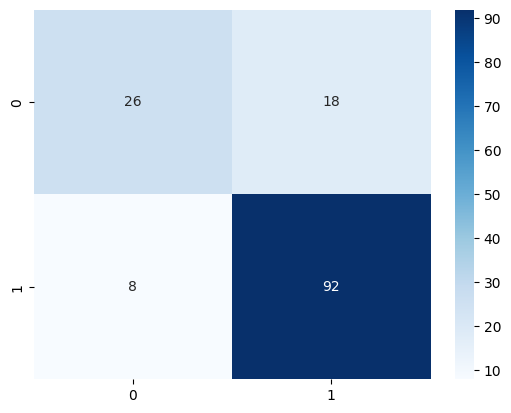

In [162]:
classifier = DecisionTreeClassifier()   
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': np.arange(4,8),
              'min_samples_split': np.arange(3,8),
              'min_samples_leaf': np.arange(3,8)}
ps,f1,acs,rs=hyperp_search(classifier,parameters)
ps2=ps
f12=f1
acs2=acs
rs2=rs

AUC: 0.76


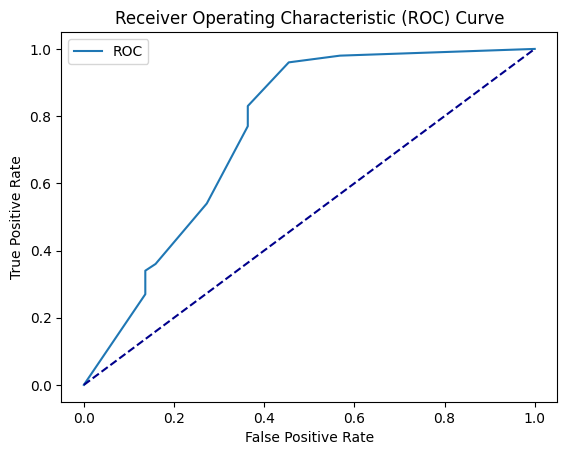

In [163]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3, min_samples_split=4)
fpr2,tpr2,auc=roc(model_tree,X_train,y_train,X_test,y_test)
auc2=auc

Considering the scatter matrix, this model appears to perform better, but many negatives are still classified as positives.

The following code serves to create a detailed visual explanation of how the Decision Tree operates, including its splitting rules, feature importance, and classification results.

|--- Credit_History <= 0.50
|   |--- Property_Area_Urban <= 0.50
|   |   |--- logApplicantIncome <= 0.57
|   |   |   |--- logApplicantIncome <= 0.54
|   |   |   |   |--- logCoapplicantIncome <= 0.74
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- logCoapplicantIncome >  0.74
|   |   |   |   |   |--- class: 0
|   |   |   |--- logApplicantIncome >  0.54
|   |   |   |   |--- class: 1
|   |   |--- logApplicantIncome >  0.57
|   |   |   |--- class: 0
|   |--- Property_Area_Urban >  0.50
|   |   |--- class: 0
|--- Credit_History >  0.50
|   |--- logLoanAmount <= 0.67
|   |   |--- Property_Area_Semiurban <= 0.50
|   |   |   |--- logCoapplicantIncome <= 0.14
|   |   |   |   |--- logApplicantIncome <= 0.57
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- logApplicantIncome >  0.57
|   |   |   |   |   |--- class: 1
|   |   |   |--- logCoapplicantIncome >  0.14
|   |   |   |   |--- logLoanAmount <= 0.56
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- logLoanAmount >  0.56
|   

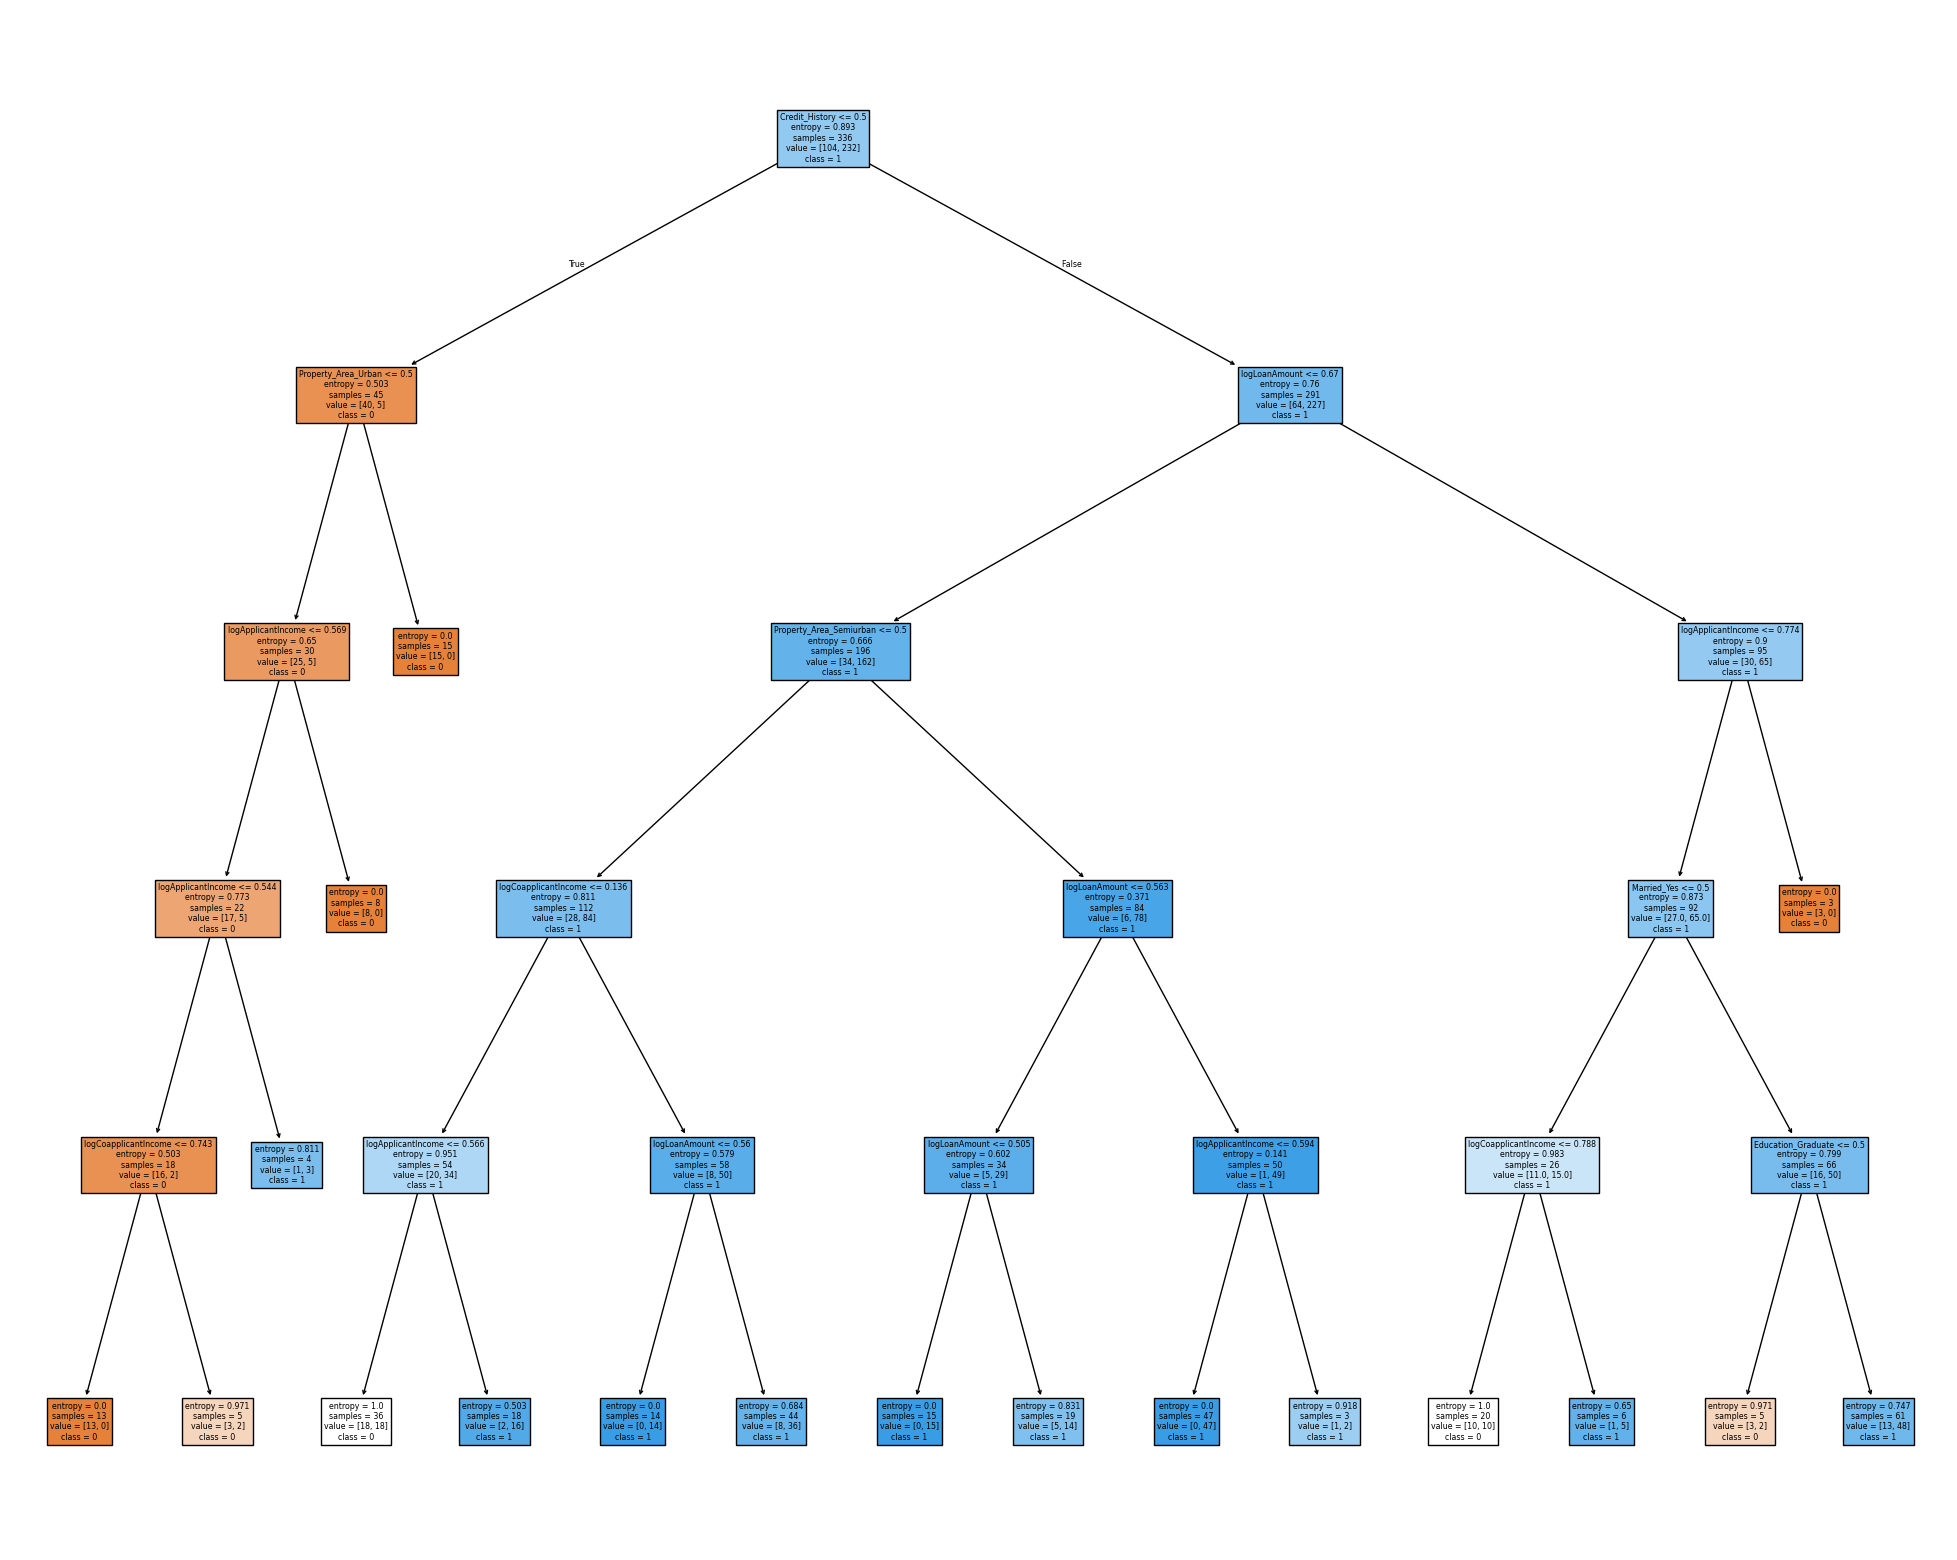

In [164]:
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=4)
print(r)
fig = plt.figure(figsize=(25,20))   
_ = tree.plot_tree(model_tree, 
                   feature_names=X_test.columns.tolist(),  
                   class_names=['0','1'],                      
                   filled=True)

The left branch (low Credit_History) almost always leads to class: 0, while most of the right branch (high Credit_History) leads to class: 1.
This might indicate a bias in the model, heavily relying on Credit_History for predictions.

### Naive Bayes

f1         train 0.848   test 0.870
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        44
           1       0.84      0.90      0.87       100

    accuracy                           0.81       144
   macro avg       0.79      0.76      0.77       144
weighted avg       0.81      0.81      0.81       144



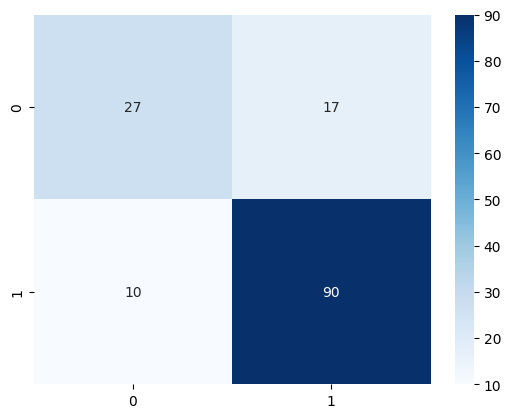

In [171]:
model = GaussianNB()     
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) ))
ps3=precision_score(y_test, y_pred)
f13=f1_score(y_test, y_pred)
acs3=accuracy_score(y_test, y_pred)
rs3=recall_score(y_test, y_pred)
#print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
print(classification_report(y_test, y_pred))

AUC: 0.80


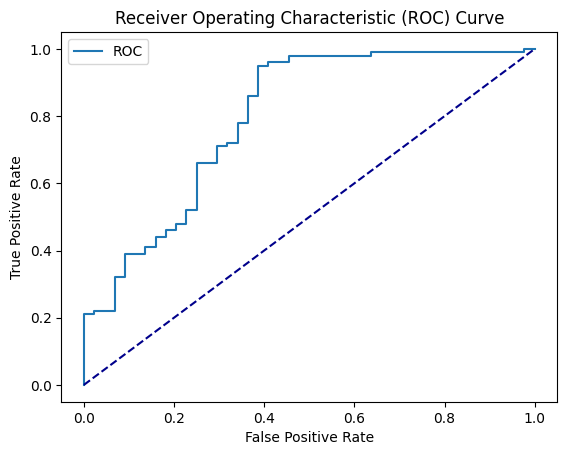

In [122]:
fpr3,tpr3,auc=roc(model,X_train,y_train,X_test,y_test)
auc3=auc

This model appears to have a similar performance to the Decision Tree Model, with more positives classified as negatives but slightly more negatives correctly classified.

### Logistic Regression

f1_train: 0.861186 using {'C': 1, 'max_iter': 10000}
f1         train 0.870   test 0.895
precision  train 0.783   test 0.824


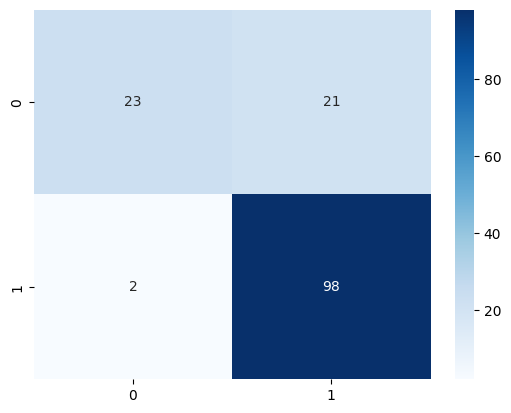

In [156]:
classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], 
              "max_iter":[10000] }
ps,f1,acs,rs=hyperp_search(classifier,parameters)
ps4=ps
f14=f1
acs4=acs
rs4=rs

AUC: 0.82


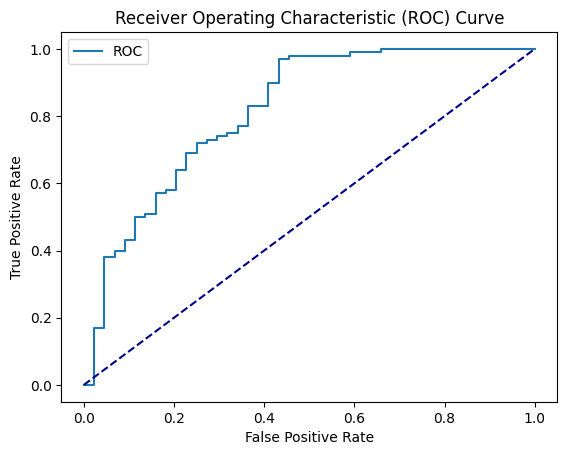

In [160]:
model_logistic = LogisticRegression(C=1, max_iter=10000)
fpr4,tpr4,auc=roc(model_logistic,X_train,y_train,X_test,y_test)
auc4=auc

Almost all positives are correctly classified, but almost half of the negatives are classified as positives.

We want to inspect and visualize the coefficients of the model, which indicate the influence of each feature on the target prediction.

[[-0.07667043  0.0772009  -0.22191249  0.22244296  0.05402174 -0.25827363
   0.24029078 -0.03550841  0.12551981 -0.12498934  0.08704734 -0.08651687
  -0.39215382  0.55358308 -0.16089879 -0.02255306  0.50645848 -0.90322738
  -0.30768247  2.76653925]]


Text(0, 0.5, 'W')

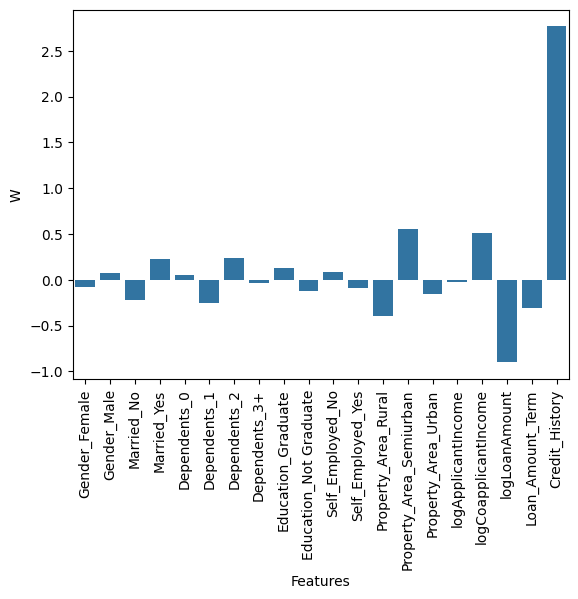

In [125]:
print(model.coef_)
list(zip(X_train.columns, model.coef_[0,:]))
sns.barplot(x=X_train.columns, y=model.coef_[0,:])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('W')

The model appears to be heavily relying on Credit History.

### Support Vector Machine (SVM)

f1_train: 0.867875 using {'C': 0.1, 'kernel': 'linear'}
f1         train 0.868   test 0.895
precision  train 0.780   test 0.824


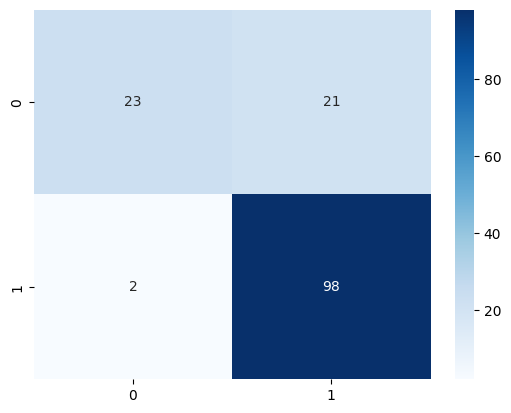

In [126]:
classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,10]}
ps,f1,acs,rs=hyperp_search(classifier,parameters)
ps5=ps
f15=f1
acs5=acs
rs5=rs

AUC: 0.75


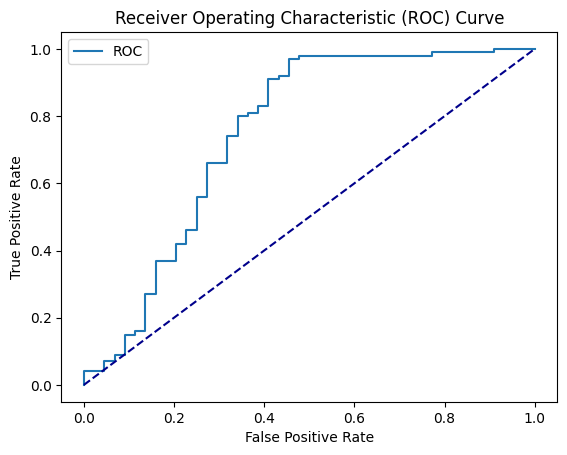

In [127]:
model = SVC(C=0.1, kernel='linear', probability=True)  
fpr5,tpr5,auc = roc(model,X_train,y_train,X_test,y_test)
auc5 = auc

Almost all positives are correctly classified, but almost half of the negatives are classified as positives.


### Multi-Layer Perceptron classifier


f1_train: 0.857242 using {'alpha': 0.1, 'hidden_layer_sizes': (10, 5), 'max_iter': 2000}
f1         train 0.870   test 0.885
precision  train 0.792   test 0.821


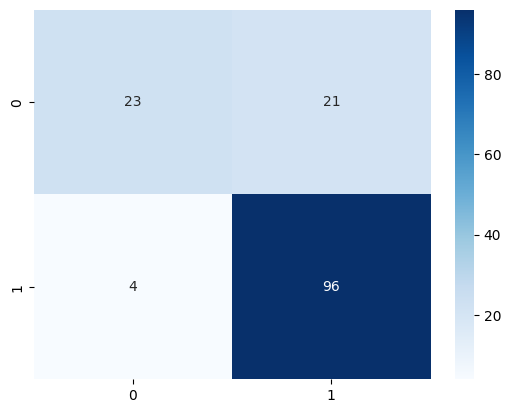

In [128]:
classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,25,5),(100,50,10,5)],  "max_iter": [2000], "alpha": [0.001,0.01,0.1]}
ps,f1,acs,rs=hyperp_search(classifier,parameters)
ps6=ps
f16=f1
acs6=acs    
rs6=rs

AUC: 0.73


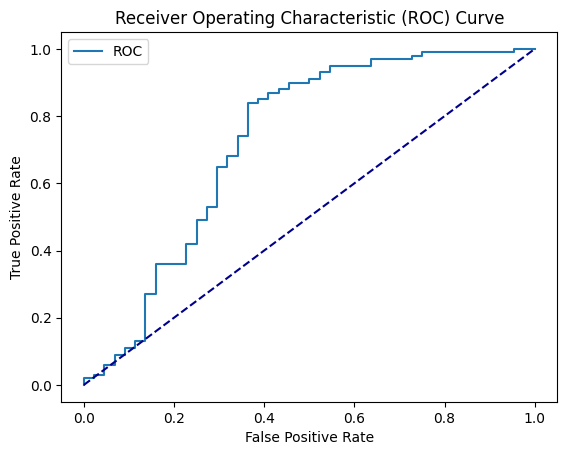

In [129]:
model_MLP=MLPClassifier(hidden_layer_sizes=(100,50,10,5), alpha=0.1, max_iter=2000)
fpr6,tpr6,auc=roc(model_MLP,X_train,y_train,X_test,y_test)
auc6=auc

Almost all positives are correctly classified, but almost half of the negatives are classified as positives.


### Random Forest

c:\Users\sanna\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


f1_train: 0.869138 using {'criterion': 'gini', 'max_depth': np.int64(6), 'min_samples_leaf': np.int64(4), 'min_samples_split': np.int64(6), 'n_estimators': 100}
f1         train 0.878   test 0.895
precision  train 0.796   test 0.824


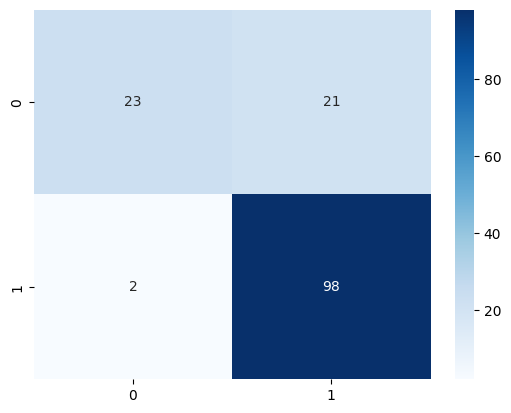

In [ ]:
classifier= RandomForestClassifier()
parameters = {'n_estimators' : [50,100,150],
             'criterion' : ['entropy', 'gini'],
             'max_depth': np.arange(4,8),
              'min_samples_split': np.arange(3,8),
              'min_samples_leaf': np.arange(3,8)}
ps,f1,acs,rs=hyperp_search(classifier,parameters)
ps7=ps
f17=f1
acs7=acs
rs7=rs

AUC: 0.82


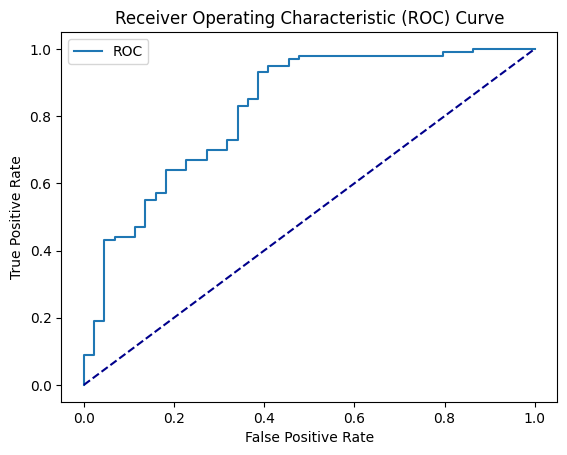

In [131]:
model_random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=6, min_samples_leaf=4, min_samples_split=6)
fpr7,tpr7,auc=roc(model_random_forest,X_train,y_train,X_test,y_test)
auc7=auc

Almost all positives are correctly classified, but almost half of the negatives are classified as positives.


Observing the behavior of some models it's possible to notice the use of variables (e.g. gender) used to discriminate between loan approval and rejection that might not be logically significant.

For example, the higher approval rates for male applicants could be influenced by other factors, such as potentially higher average incomes.  
To determine this, it would be necessary to evaluate the collinearity between the variable in question (gender) and other features to demonstrate that it does not have a significant independent impact.

## Model Evaluation

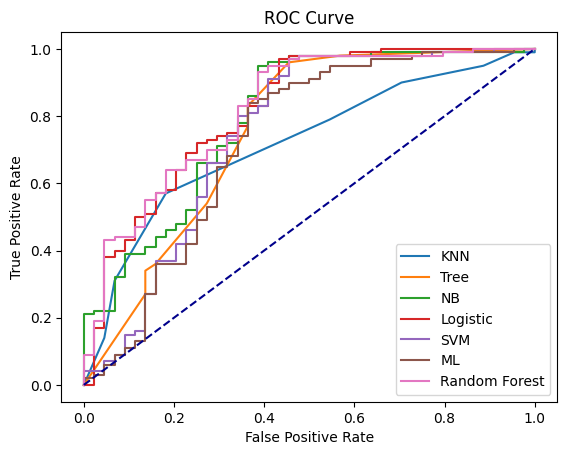

In [165]:
# ROC curve comparison
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "ML")
plt.plot(fpr7, tpr7, label= "Random Forest")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The model with the maximum auc value is: RF


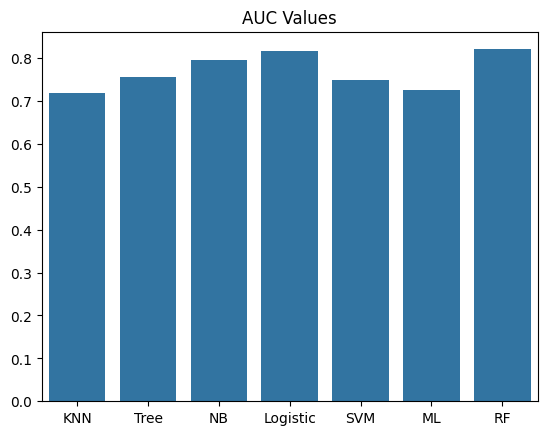

In [166]:
# AUC comparison
data=[auc1, auc2, auc3, auc4, auc5, auc6, auc7]
sns.barplot(x=["KNN","Tree","NB","Logistic","SVM","ML","RF"], y=data)
plt.title('AUC Values')

# Displays the model with the higher auc
x=["KNN","Tree","NB","Logistic","SVM","ML","RF"]
index = data.index(max(data))
print("The model with the maximum auc value is:", x[index])

The model with the maximum ps value is: NB


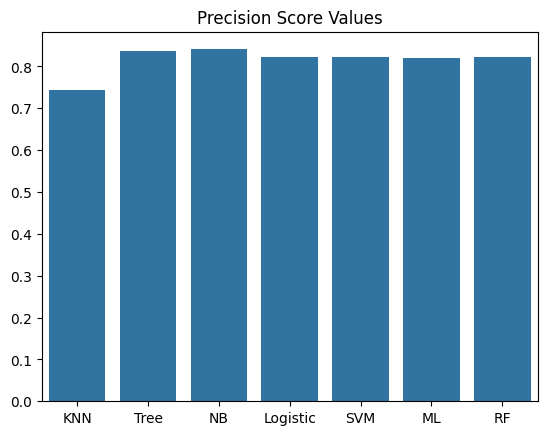

In [167]:
# Precision score comparison
data2=[ps1, ps2, ps3, ps4, ps5, ps6, ps7]
sns.barplot(x=["KNN","Tree","NB","Logistic","SVM","ML","RF"], y=data2)
plt.title('Precision Score Values')

# Displays the model with the higher ps
x=["KNN","Tree","NB","Logistic","SVM","ML","RF"]
index = data2.index(max(data2))
print("The model with the maximum ps value is:", x[index])


The model with the maximum f1 value is: Logistic


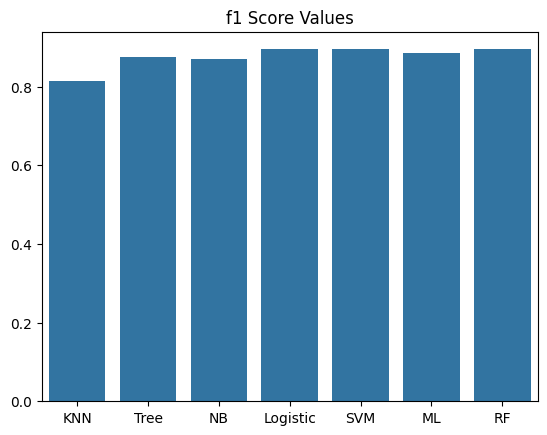

In [168]:
# f1 score comparison
data3=[f11, f12, f13, f14, f15, f16, f17]
sns.barplot(x=["KNN","Tree","NB","Logistic","SVM","ML","RF"], y=data3)
plt.title('f1 Score Values')

# Displays the model with the higher f1
x=["KNN","Tree","NB","Logistic","SVM","ML","RF"]
index = data3.index(max(data3))
print("The model with the maximum f1 value is:", x[index])

The model with the maximum acs value is: Logistic


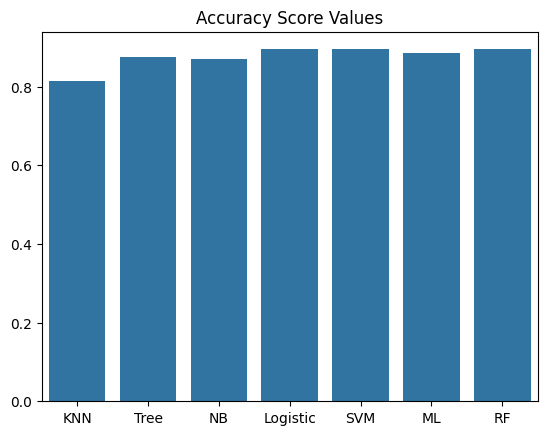

In [169]:
# accuracy score comparison
data4=[acs1, acs2, acs3, acs4, acs5, acs6, acs7]
sns.barplot(x=["KNN","Tree","NB","Logistic","SVM","ML","RF"], y=data3)
plt.title('Accuracy Score Values')

# Displays the model with the higher acs
x=["KNN","Tree","NB","Logistic","SVM","ML","RF"]
index = data4.index(max(data4))
print("The model with the maximum acs value is:", x[index])

The model with the maximum rs value is: Logistic


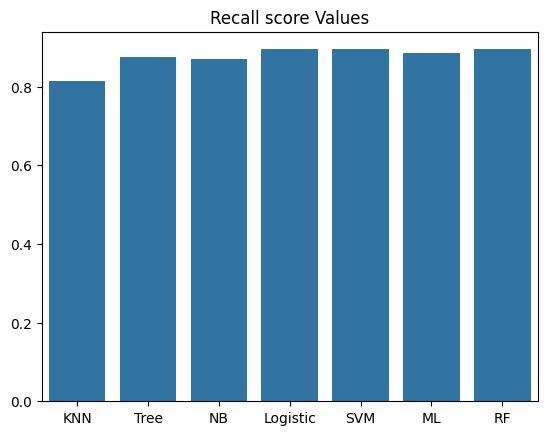

In [170]:
# recall values comparison
data5=[rs1, rs2, rs3, rs4, rs5, rs6, rs7]
sns.barplot(x=["KNN","Tree","NB","Logistic","SVM","ML","RF"], y=data3)
plt.title('Recall score Values')

# Displays the model with the higher rs
x=["KNN","Tree","NB","Logistic","SVM","ML","RF"]
index = data5.index(max(data5))
print("The model with the maximum rs value is:", x[index])

## Model Selection

Considering all parameters, Logistic Regression for Classification appears to be the model with the best performance overall.

In [161]:
#Saving the choosen model
import pickle
pickle.dump(model_logistic, open('model_logistic.pkl', 'wb'))